In [ ]:
# Run this if you can't import AlphaOpt
# Alternatively, use os.chdir('[AlphaOpt_directory]')
import os
for i in range(4):
    if os.path.split(os.getcwd())[1] == 'AlphaOpt':
        break
    %cd ".."
os.getcwd()

In [2]:
%pylab inline
import GPyOpt
import GPy

from AlphaOpt import components
from AlphaOpt.components import CustomCostModel as CostModel

Populating the interactive namespace from numpy and matplotlib


In [3]:
from experiments.cnn.experiment_cnn_components import cnn_accuracy_base, domain

cnn_accuracy = cnn_accuracy_base(verbose=0, summary=False, accuracy=True)
objective = GPyOpt.core.task.SingleObjective(cnn_accuracy)
space = GPyOpt.Design_space(space=domain)
X_init = GPyOpt.util.stats.initial_design('random', space, 3)

Using Theano backend.
DEBUG: nvcc STDOUT nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
mod.cu
   Creating library C:/theano_compiledir/compiledir_Windows-10-10.0.14393-SP0-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.5.1-64/tmpp7d6d0cc/m91973e5c136ea49268a916ff971b7377.lib and object C:/theano_compiledir/compiledir_Windows-10-10.0.14393-SP0-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.5.1-64/tmpp7d6d0cc/m91973e5c136ea49268a916ff971b7377.exp

Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 5105)


In [4]:
# Bayesian Optimization Components
# GP models
dim = len(domain)
model = GPyOpt.models.GPModel(kernel=GPy.kern.Matern52(input_dim=dim, ARD=True),
                              optimize_restarts=5,
                              verbose=False)
cost = CostModel(kernel=GPy.kern.Matern52(input_dim=dim, ARD=True),
                 cost_withGradients='evaluation_time')

# Decision models
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
aquisition = GPyOpt.acquisitions.EI.AcquisitionEI(model, space, aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(aquisition)

In [5]:
# Combine everything
bo = GPyOpt.methods.ModularBayesianOptimization(model=model,
                                                space=space,
                                                objective=objective,
                                                acquisition=aquisition,
                                                evaluator=evaluator,
                                                X_init=X_init,
                                                cost=cost)

DEBUG: nvcc STDOUT mod.cu
   Creating library C:/theano_compiledir/compiledir_Windows-10-10.0.14393-SP0-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.5.1-64/tmpnovf0esj/m9a6bd0eb5ed5c92e91261282fc495cb4.lib and object C:/theano_compiledir/compiledir_Windows-10-10.0.14393-SP0-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.5.1-64/tmpnovf0esj/m9a6bd0eb5ed5c92e91261282fc495cb4.exp

DEBUG: nvcc STDOUT mod.cu
   Creating library C:/theano_compiledir/compiledir_Windows-10-10.0.14393-SP0-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.5.1-64/tmp8zehrtvh/mcaee517fdbbfe5601d70389b5e9a720a.lib and object C:/theano_compiledir/compiledir_Windows-10-10.0.14393-SP0-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.5.1-64/tmp8zehrtvh/mcaee517fdbbfe5601d70389b5e9a720a.exp





[[  0.12295843  30.          80.           2.           3.        ]]
387/387 [==============================] - 0s     
0.152454780362


352/387 [==========================>...] - ETA: 0s

[[  0.4083478  30.         50.          5.          2.       ]]
352/387 [==========================>...] - ETA: 0s0.149870801034


352/387 [==========================>...] - ETA: 0s

[[  3.56132463e-02   4.00000000e+01   7.00000000e+01   5.00000000e+00
    3.00000000e+00]]
352/387 [==========================>...] - ETA: 0s0.118863049096


352/387 [==========================>...] - ETA: 0s

[[  0.60364776  20.          40.           2.           1.        ]]
387/387 [==============================] - 0s     
0.240310077519


387/387 [==============================] - 0s     


[[  0.5808602  40.         60.          4.          4.       ]]
352/387 [==========================>...] - ETA: 0s0.12144702827


352/387 [==========================>...] - ETA: 0s

In [6]:
max_iter= 10
bo.run_optimization(max_iter=max_iter)



[[  3.56137645e-02   4.00000000e+01   7.00000000e+01   5.00000000e+00
    3.00000000e+00]]
352/387 [==========================>...] - ETA: 0s0.103359173127


352/387 [==========================>...] - ETA: 0s

[[  3.56138661e-02   4.00000000e+01   7.00000000e+01   5.00000000e+00
    3.00000000e+00]]
387/387 [==============================] - 0s     
0.134366925065


352/387 [==========================>...] - ETA: 0s

[[  3.56138437e-02   4.00000000e+01   7.00000000e+01   5.00000000e+00
    3.00000000e+00]]
352/387 [==========================>...] - ETA: 0s0.108527131783


352/387 [==========================>...] - ETA: 0s

[[  0.55697646  10.          10.           2.           1.        ]]
387/387 [==============================] - 0s     
0.377260981912


384/387 [============================>.] - ETA: 0s

[[  0.98992991  40.          10.           2.           1.        ]]
384/387 [============================>.] - ETA: 0s0.511627906977


384/387 [============================>.] -

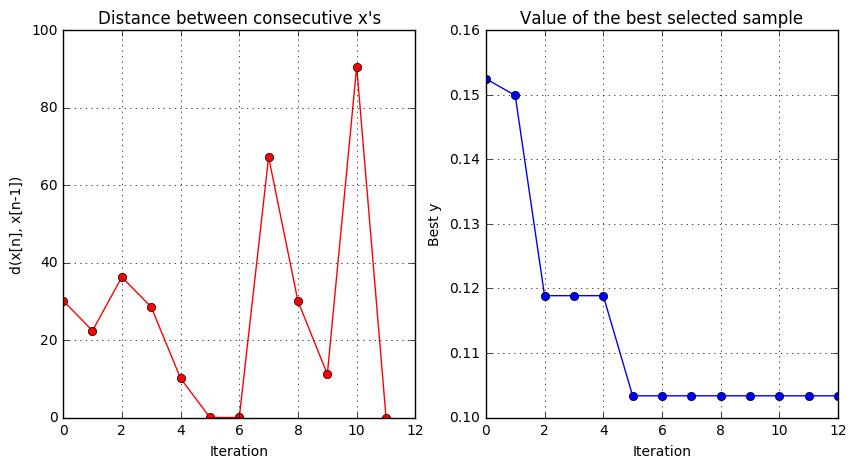

In [7]:
bo.plot_acquisition()
bo.plot_convergence() # Note: Value is 1 - accuracy%

In [11]:
# best hyperparameter and error rate 
print(bo.X[np.argmin(bo.Y)])
np.min(bo.Y)

[  3.56137645e-02   4.00000000e+01   7.00000000e+01   5.00000000e+00
   3.00000000e+00]


0.10335917312661502

In [ ]:
#TODO: Compare between BO, BO with custom acquisition, Random Search